<a href="https://colab.research.google.com/github/JyotiSaxena1/diabetic-retinopathy/blob/main/flood_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Use these 3 codeblocks to run files locally
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [ ]:
# !kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-2019-data


In [ ]:
# !unzip \*.zip && rm *.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jyotisaxena1","key":"62a65b56fc54b30fee07198c0d5dc317"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-2019-data


Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data
License(s): CC0-1.0
 94% 223M/238M [00:02<00:00, 97.4MB/s]
100% 238M/238M [00:02<00:00, 105MB/s] 


In [ ]:
!unzip diabetic-retinopathy-224x224-2019-data.zip -d /content/diabetic-retinopathy-224x224-2019-data

Archive:  diabetic-retinopathy-224x224-2019-data.zip
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/0024cdab0c1e.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/00cb6555d108.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/0124dffecf29.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/01b3aed3ed4c.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/0369f3efe69b.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/03e25101e8e8.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/04ac765f91a1.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/059bc89df7f4.png  
  inflating: /content/diabetic-retinopathy-224x224-2019-data/colored_images/Mild/05a5183c92d0.png  
  inflating: /content/diabetic-retinopathy-224x

In [ ]:
!ls /content/diabetic-retinopathy-224x224-2019-data



colored_images	train.csv


In [ ]:
!ls /content/diabetic-retinopathy-224x224-2019-data


colored_images	train.csv


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
# Split training and validation datasets (80% training, 20% validation)
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/diabetic-retinopathy-224x224-2019-data/colored_images',  # Path to colored_images folder
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),  # Image size as per dataset
    shuffle=True,
    validation_split=0.2,  # 20% validation split
    subset='training',  # This is the training subset
    seed=42  # Ensure reproducibility
)

Found 3662 files belonging to 5 classes.
Using 2930 files for training.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/diabetic-retinopathy-224x224-2019-data/colored_images',  # Path to colored_images folder
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),  # Image size as per dataset
    shuffle=True,
    validation_split=0.2,  # 20% validation split
    subset='validation',  # This is the validation subset
    seed=42  # Ensure reproducibility
)

Found 3662 files belonging to 5 classes.
Using 732 files for validation.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
# Block 1: Input and Initial Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Block 2: Second Set of Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Block 4: Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.40))

In [ ]:
# Block 3: Third Set of Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Block 4: Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.50))

In [ ]:
# Block Extra: Third Set of Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Block 4: Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
# Block Extra: Third Set of Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Block 4: Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
# Block 5: Global Average Pooling
cnn.add(tf.keras.layers.GlobalAveragePooling2D())

In [ ]:
# Block 6: Dense Layers
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.50))  # Dropout to avoid overfitting

In [ ]:
# Block 7: Output Layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [ ]:
# cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
# cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
# #Output Layer
# cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [ ]:
# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Learning Rate Reduction Callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)


In [ ]:
##Dense-Net based

*Dense Net Based Architecture*

In [ ]:
# Define the dense_block function
def dense_block(x, num_layers):
    for _ in range(num_layers):
        shortcut = x
        x = tf.keras.layers.Conv2D(32, kernel_size=3, padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.Concatenate()([x, shortcut])  # Concatenate the input
    return x


In [ ]:
# Block 1: Initial Convolution and MaxPooling
inputs = tf.keras.Input(shape=[224, 224, 3])  # Define the input layer
x = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same')(inputs)  # Initial convolution
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)  # Max Pooling

In [ ]:
# Block 2: First Dense Block
x = dense_block(x, 4)  # Applying the first dense block with 4 convolution layers
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)  # Max Pooling

In [ ]:
# Block 3: Second Dense Block
x = dense_block(x, 4)  # Applying the second dense block with 4 convolution layers

In [ ]:
# Block 4: Global Average Pooling and Output Layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Global Average Pooling
outputs = tf.keras.layers.Dense(units=5, activation='softmax')(x)  # Output layer

In [ ]:
# Create the model using the Functional API
cnn = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Block 5: Compile the Model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 224, 224, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 112, 112, 64)   │              0 │ conv2d_10[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 112, 112, 32)   │         18,464 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 112, 112, 32)   │            128 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 112, 112, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 112, 112, 96)   │              0 │ re_lu[0][0],           │
│                           │                        │                │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 112, 112, 32)   │         27,680 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 112, 112, 32)   │            128 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 112, 112, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 112, 112, 128)  │              0 │ re_lu_1[0][0],         │
│ (Concatenate)             │                        │                │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 112, 112, 32)   │         36,896 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 112, 112, 32)   │            128 │ conv2d_13[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 112, 112, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 112, 112, 160)  │              0 │ re_lu_2[0][0],         │
│ (Concatenate)             │                        │                │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)   

 Total params: 410,181 (1.56 MB)

 Trainable params: 409,669 (1.56 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# Fit the model using the correct datasets
training_history = cnn.fit(training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 67s 417ms/step - accuracy: 0.4279 - loss: 3.6976 - val_accuracy: 0.5000 - val_loss: 1.3590
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - accuracy: 0.5440 - loss: 1.2512 - val_accuracy: 0.6270 - val_loss: 1.2545
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 196ms/step - accuracy: 0.5825 - loss: 1.2435 - val_accuracy: 0.5068 - val_loss: 1.2795
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.6040 - loss: 1.1865 - val_accuracy: 0.4495 - val_loss: 1.7119
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.6456 - loss: 1.0168 - val_accuracy: 0.5984 - val_loss: 1.1020
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.6247 - loss: 1.0605 - val_accuracy: 0.4112 - val_loss: 1.9608
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - accuracy: 0.6649 - loss: 0.9676 - val_accuracy: 0.6899 - val_loss: 0.8880
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.6618 - loss: 0.9688 - val_accu

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.6050 - loss: 1.2412
Training accuracy: 0.6153583526611328


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6088 - loss: 1.3023
Validation accuracy: 0.6161202192306519


In [ ]:
cnn.save('Retinoscopy.keras')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.492832750082016,
  0.5511945486068726,
  0.5761092305183411,
  0.6375426650047302,
  0.6488054394721985,
  0.6494880318641663,
  0.6778156757354736,
  0.6624573469161987,
  0.6805460453033447,
  0.6696245670318604],
 'loss': [2.1244089603424072,
  1.2573672533035278,
  1.2461879253387451,
  1.103261113166809,
  1.00850248336792,
  1.0000773668289185,
  0.9364160299301147,
  0.9805325865745544,
  0.9149549007415771,
  0.9571698307991028],
 'val_accuracy': [0.5,
  0.6270492076873779,
  0.5068305730819702,
  0.44945356249809265,
  0.5983606576919556,
  0.41120219230651855,
  0.6898906826972961,
  0.3019125759601593,
  0.6530054807662964,
  0.6161202192306519],
 'val_loss': [1.358954668045044,
  1.2544927597045898,
  1.2795037031173706,
  1.711928367614746,
  1.1020197868347168,
  1.960779070854187,
  0.8880369067192078,
  3.3750412464141846,
  0.9791030287742615,
  1.264485478401184]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print('History is : ')
print(training_history.history.keys())

History is : 
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


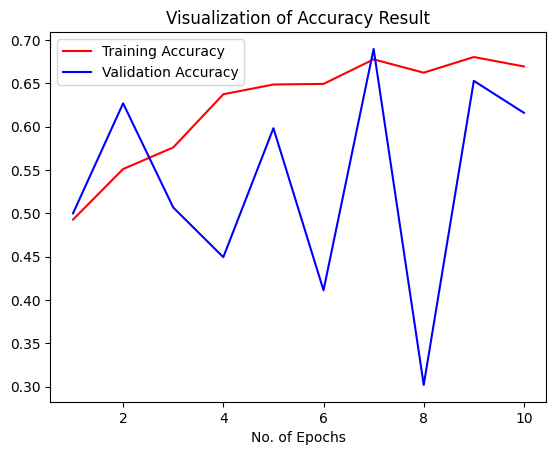

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/diabetic-retinopathy-224x224-2019-data/colored_images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3662 files belonging to 5 classes.


In [ ]:
# Resize function
def resize_image(image, label):
    image = tf.image.resize(image, [224, 224])  # Resize to (224, 224)
    return image, label

# Apply resize to the dataset
test_set = test_set.map(resize_image)


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


3662/3662 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(3662,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(3662,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00       370
      Moderate       0.29      0.99      0.45       999
         No_DR       0.90      0.12      0.21      1805
Proliferate_DR       0.00      0.00      0.00       295
        Severe       0.00      0.00      0.00       193

      accuracy                           0.33      3662
     macro avg       0.24      0.22      0.13      3662
  weighted avg       0.52      0.33      0.23      3662



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


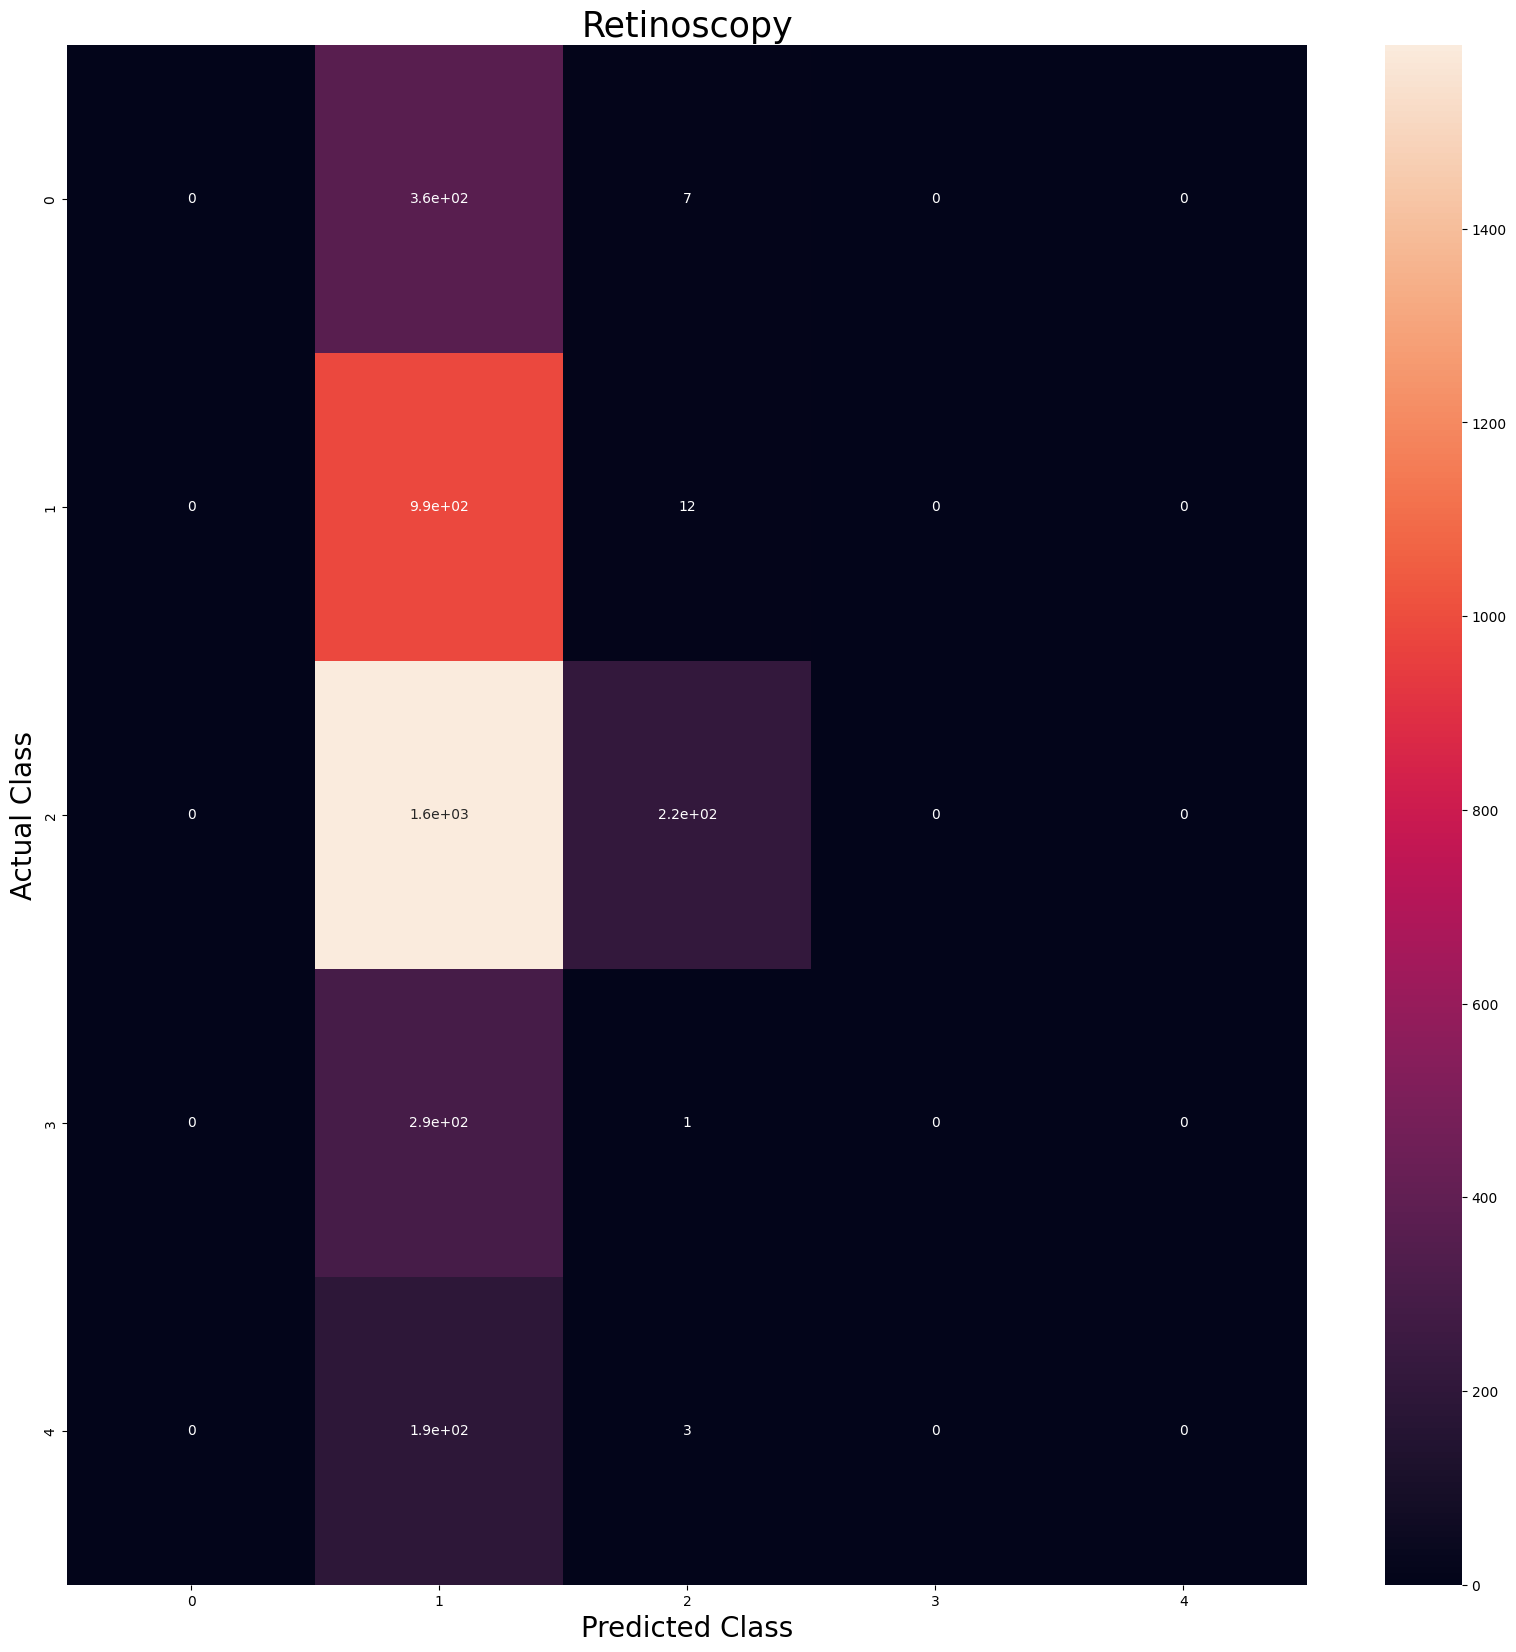

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Retinoscopy',fontsize = 25)
plt.show()

In [ ]:
import tensorflow as tf

# Calculate the number of batches in the training and validation datasets
num_train_batches = tf.data.experimental.cardinality(training_set).numpy()
num_valid_batches = tf.data.experimental.cardinality(validation_set).numpy()

batch_size = 32  # Replace with your actual batch size
num_train_images = num_train_batches * batch_size
num_valid_images = num_valid_batches * batch_size

print(f'Number of training images: {num_train_images}')
print(f'Number of validation images: {num_valid_images}')

Number of training images: 2944
Number of validation images: 736


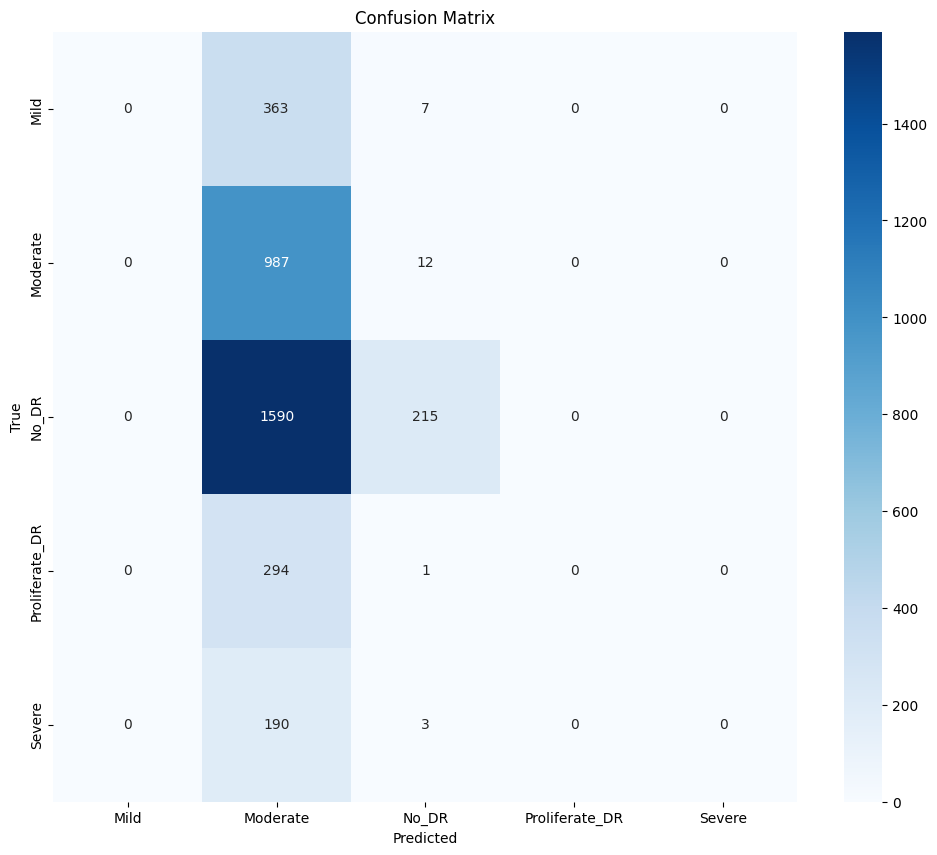

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Plotting the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


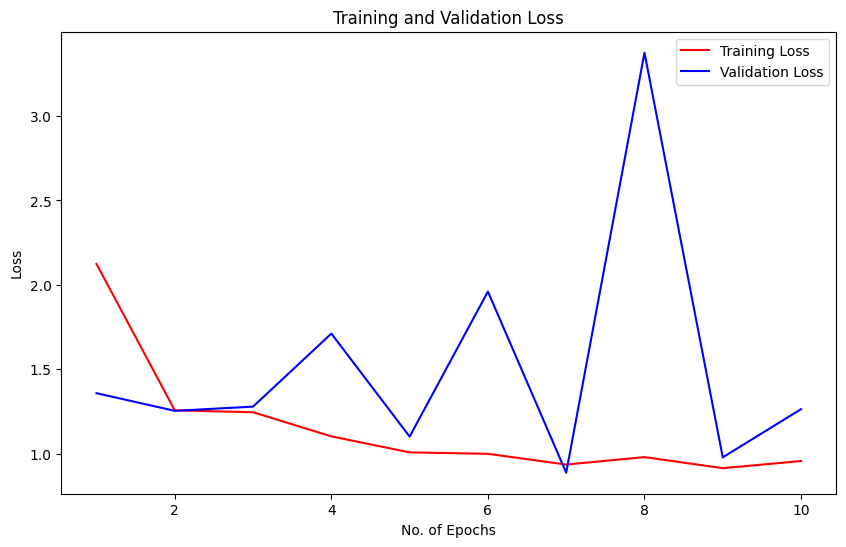

In [ ]:
# Plotting the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Building a model with combining Combining Transfer Learning and Ensemble Learning:


Here's a blockwise code implementation for combining transfer learning and ensemble learning using two popular pre-trained models: EfficientNetB0 and ResNet50.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Load EfficientNetB0 and ResNet50 pre-trained models without the top layers
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base models to prevent weights from being updated during initial training
efficientnet_base.trainable = False
resnet_base.trainable = False


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# For EfficientNetB0
x1 = efficientnet_base.output
x1 = GlobalAveragePooling2D()(x1)  # Pooling layer to reduce dimensions
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.5)(x1)
efficientnet_output = Dense(5, activation='softmax')(x1)  # Assuming 5 classes

# For ResNet50
x2 = resnet_base.output
x2 = GlobalAveragePooling2D()(x2)  # Pooling layer to reduce dimensions
x2 = Dense(512, activation='relu')(x2)
x2 = Dropout(0.5)(x2)
resnet_output = Dense(5, activation='softmax')(x2)  # Assuming 5 classes


In [ ]:
# Create the models
efficientnet_model = Model(inputs=efficientnet_base.input, outputs=efficientnet_output)
resnet_model = Model(inputs=resnet_base.input, outputs=resnet_output)

# Compile both models
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train EfficientNet
efficientnet_model.fit(training_set, epochs=10, validation_data=validation_set)

# Train ResNet
resnet_model.fit(training_set, epochs=10, validation_data=validation_set)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 317ms/step - accuracy: 0.6301 - loss: 1.0151 - val_accuracy: 0.7664 - val_loss: 0.6365
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7538 - loss: 0.6639 - val_accuracy: 0.7951 - val_loss: 0.5841
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.7762 - loss: 0.5856 - val_accuracy: 0.7678 - val_loss: 0.6284
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.7934 - loss: 0.5965 - val_accuracy: 0.7923 - val_loss: 0.5434
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7813 - loss: 0.5530 - val_accuracy: 0.7842 - val_loss: 0.5849
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7911 - loss: 0.5446 - val_accuracy: 0.7978 - val_loss: 0.5405
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7936 - loss: 0.5261 - val_accuracy: 0.7814 - val_loss: 0.5688
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8046 - loss: 0.5055 - val_accuracy: 0.8019 

In [ ]:
import numpy as np

def ensemble_predict(models, test_data):
    # Get predictions from each model
    predictions = [model.predict(test_data) for model in models]

    # Average the predictions from all models
    avg_predictions = np.mean(predictions, axis=0)

    return avg_predictions

# Models to ensemble
models = [efficientnet_model, resnet_model]

# Predict using the ensemble
ensemble_predictions = ensemble_predict(models, validation_set)

# Choose the class with the highest average probability
ensemble_class_predictions = np.argmax(ensemble_predictions, axis=1)


23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 291ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step


In [ ]:
import numpy as np

# Extract the labels from the validation set
test_labels = np.concatenate([y for x, y in validation_set], axis=0)


In [ ]:
test_labels = np.argmax(test_labels, axis=1)


In [ ]:
print(f"Shape of ensemble_class_predictions: {ensemble_class_predictions.shape}")


Shape of ensemble_class_predictions: (732,)


In [ ]:
# If ensemble_class_predictions is already a 1D array of class labels
class_predictions = ensemble_class_predictions


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, class_predictions)
print(f"Ensemble Accuracy: {accuracy * 100:.2f}%")


Ensemble Accuracy: 39.89%


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
# Load EfficientNetB0 pre-trained model without the top layers
efficientnet_base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Load ResNet50 pre-trained model without the top layers
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


In [ ]:
# EfficientNet Custom Classifier
efficientnet_output = efficientnet_base.output
efficientnet_output = GlobalAveragePooling2D()(efficientnet_output)
efficientnet_output = Dense(5, activation='softmax')(efficientnet_output)  # Assuming 5 classes

# Create EfficientNet Model
efficientnet_model = Model(inputs=efficientnet_base.input, outputs=efficientnet_output)


In [ ]:
# ResNet Custom Classifier
resnet_output = resnet_base.output
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = Dense(5, activation='softmax')(resnet_output)  # Assuming 5 classes

# Create ResNet Model
resnet_model = Model(inputs=resnet_base.input, outputs=resnet_output)


In [ ]:
# Freeze the base layers of EfficientNet
for layer in efficientnet_base.layers:
    layer.trainable = False

# Freeze the base layers of ResNet
for layer in resnet_base.layers:
    layer.trainable = False


In [ ]:
# Compile EfficientNet model
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compile ResNet model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Fine-tune EfficientNet
efficientnet_history = efficientnet_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10  # Adjust epochs as needed
)

# Fine-tune ResNet
resnet_history = resnet_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10  # Adjust epochs as needed
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.5910 - loss: 1.1035 - val_accuracy: 0.7418 - val_loss: 0.7615
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7401 - loss: 0.7397 - val_accuracy: 0.7678 - val_loss: 0.6750
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.7672 - loss: 0.6628 - val_accuracy: 0.7664 - val_loss: 0.6496
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.7710 - loss: 0.6144 - val_accuracy: 0.7773 - val_loss: 0.6152
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7852 - loss: 0.5840 - val_accuracy: 0.7760 - val_loss: 0.6107
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7942 - loss: 0.5586 - val_accuracy: 0.7814 - val_loss: 0.5971
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8009 - loss: 0.5487 - val_accuracy: 0.7746 - val_loss: 0.6190
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7962 - loss: 0.5430 - val_accuracy: 0.7842 

In [ ]:
# Unfreeze the last few layers of EfficientNet for fine-tuning
for layer in efficientnet_base.layers[-20:]:  # You can adjust how many layers to unfreeze
    layer.trainable = True

# Unfreeze the last few layers of ResNet for fine-tuning
for layer in resnet_base.layers[-20:]:  # You can adjust how many layers to unfreeze
    layer.trainable = True


In [ ]:
# Re-compile the models after unfreezing layers
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Fine-tune EfficientNet again
efficientnet_fine_tune_history = efficientnet_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10  # Adjust epochs as needed
)

# Fine-tune ResNet again
resnet_fine_tune_history = resnet_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10  # Adjust epochs as needed
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 52s 296ms/step - accuracy: 0.7404 - loss: 0.7362 - val_accuracy: 0.7172 - val_loss: 1.0157
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8370 - loss: 0.4250 - val_accuracy: 0.7582 - val_loss: 0.7368
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8672 - loss: 0.3310 - val_accuracy: 0.7951 - val_loss: 0.6495
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8948 - loss: 0.2821 - val_accuracy: 0.8005 - val_loss: 0.6724
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9239 - loss: 0.2119 - val_accuracy: 0.8019 - val_loss: 0.6904
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9163 - loss: 0.2083 - val_accuracy: 0.7978 - val_loss: 0.8132
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9476 - loss: 0.1616 - val_accuracy: 0.8156 - val_loss: 0.7544
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9567 - loss: 0.1361 - val_accuracy: 0.7814

In [ ]:
# Print the summary of the EfficientNet model
print("EfficientNet Model Summary:")
efficientnet_model.summary()


EfficientNet Model Summary:


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 6,770,708 (25.83 MB)

 Trainable params: 1,357,365 (5.18 MB)

 Non-trainable params: 2,698,611 (10.29 MB)

 Optimizer params: 2,714,732 (10.36 MB)

In [ ]:
# Print the summary of the ResNet model
print("\nResNet Model Summary:")
resnet_model.summary()



ResNet Model Summary:


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 41,481,105 (158.24 MB)

 Trainable params: 8,941,573 (34.11 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

 Optimizer params: 17,883,148 (68.22 MB)

In [ ]:
# Evaluate the EfficientNet model on the validation set
efficientnet_eval = efficientnet_model.evaluate(validation_set)
print(f"\nEfficientNet Validation Loss: {efficientnet_eval[0]:.4f}")
print(f"EfficientNet Validation Accuracy: {efficientnet_eval[1] * 100:.2f}%")

# Evaluate the ResNet model on the validation set
resnet_eval = resnet_model.evaluate(validation_set)
print(f"\nResNet Validation Loss: {resnet_eval[0]:.4f}")
print(f"ResNet Validation Accuracy: {resnet_eval[1] * 100:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8336 - loss: 0.8671

EfficientNet Validation Loss: 0.9076
EfficientNet Validation Accuracy: 82.79%
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8010 - loss: 0.9964

ResNet Validation Loss: 0.9832
ResNet Validation Accuracy: 80.05%


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
# Block 1: Import necessary libraries
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


In [ ]:
# Block 2: Define the model checkpoint callback with .keras extension
checkpoint_path = 'model_checkpoint.keras'  # Path to save the model checkpoint

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


In [ ]:
# Block 3: Define a learning rate reduction callback (optional)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


In [ ]:
# Block 4: Fit the EfficientNet model and save history
efficientnet_history = efficientnet_model.fit(
    training_set,  # Adjust as needed
    epochs=20,
    validation_data=validation_set,
    callbacks=[checkpoint, reduce_lr]  # Include checkpoint and learning rate reduction here
)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9663 - loss: 0.0972
Epoch 1: val_accuracy improved from -inf to 0.80601, saving model to model_checkpoint.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9663 - loss: 0.0972 - val_accuracy: 0.8060 - val_loss: 0.9178 - learning_rate: 0.0010
Epoch 2/20
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9715 - loss: 0.0824
Epoch 2: val_accuracy did not improve from 0.80601
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9715 - loss: 0.0822 - val_accuracy: 0.7951 - val_loss: 0.9272 - learning_rate: 0.0010
Epoch 3/20
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9725 - loss: 0.0778
Epoch 3: val_accuracy did not improve from 0.80601

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9725 - loss: 0.0779 - val_accuracy: 0.8046 - val_loss: 1.1111 - learning_rate: 0.0010
Epoch 4/20
91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - a

In [ ]:
# Block 5: Fit the ResNet model and save history
resnet_history = resnet_model.fit(
    training_set,  # Adjust as needed
    epochs=20,
    validation_data=validation_set,  # Adjust as needed
    callbacks=[checkpoint, reduce_lr]  # Include checkpoint and learning rate reduction here
)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9751 - loss: 0.0849
Epoch 1: val_accuracy did not improve from 0.82514
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9751 - loss: 0.0848 - val_accuracy: 0.8074 - val_loss: 0.8448 - learning_rate: 0.0010
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9767 - loss: 0.0668
Epoch 2: val_accuracy did not improve from 0.82514
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.9767 - loss: 0.0668 - val_accuracy: 0.7896 - val_loss: 1.0545 - learning_rate: 0.0010
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9769 - loss: 0.0649
Epoch 3: val_accuracy did not improve from 0.82514

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9769 - loss: 0.0648 - val_accuracy: 0.7855 - val_loss: 1.2122 - learning_rate: 0.0010
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9814 - loss: 0.0512


In [ ]:
# Block 6: To load the best model later
from tensorflow.keras.models import load_model

best_model = load_model(checkpoint_path)
